# 14장 - 텐서플로의 구조 자세히 알아보기 (part 1)

In [1]:
from IPython.display import Image

# 텐서플로의 주요 특징

텐서플로는 머신 러닝 알고리즘을 구현하고 실행하기 위한 프로그래밍 인터페이스이며, 확장이 용이하고 다양한 플랫폼을 지원한다. 텐서플로 API는 2019년 2.0이 릴리스되면서 새롭게 바뀌었다.  

2015년 처음 릴리스된 후로 텐서플로는 가장 널리 적용된 딥러닝 라이브러리가 되었다. 하지만 텐서플로를 배우기 어렵게 만드는 것 중 하나는 정적 계산 그래프이다. 정적 계산 그래프는 내부적으로 그래프를 잘 최적화할 수 있고 다양한 하드웨어 장치를 지원하는 등의 장점이 있다. 하지만 정적 계산 그래프는 그래프 선언과 그래프 실행 단계로 나눈어져 있어 인터랙티브하게 신경망을 개발하려는 사용자에게는 번거롭다.  

사용자의 피드백을 바탕으로 텐서플로 팀은 텐서플로 2.0에서 동적 계산 그래프를 기본으로 하기로 결정했다. 이로 인해 신경망을 만들고 훈련하는 것이 훨씬 간편해졌다.  
동적 계산 그래프는 그래프 선언과 실행을 번갈아 수행하기 때문에 파이썬과 넘파이 사용자들은 이전 버전의 텐서플로보다 텐서플로 2.0을 훨씬 자연스럽게 느낄 것이다.  

13장에서 언급했지만 텐서플로의 핵심 기능은 하나 또는 여러 개의 GPU를 사용할 수 있다는 점이다. 이를 통해 대규모 데이터셋과 대규모 시스템에서 딥러닝 모델을 매우 효율적으로 훈련할 수 있다.  

마지막으로 중요한 특징은 텐서플로가 모바일 환경을 지원하기 때문에 모바일 애플리케이션 개발에도 매우 적합하다는 것이다. 

# 텐서플로의 계산 그래프: 텐서플로 v2로 이전

텐서플로는 유향 비순환 그래프(Directed Acyclic Graph, DAG)를 기반으로 수행한다. 텐서플로 v1.x에서 이런 그래프는 저수준 API로 명시적으로 정의할 수 있다. 하지만 복잡하고 큰 모델일 경우 이런 작업은 간단하지 않다. 

## 계산 그래프 이해

텐서플로는 계산 그래프에 크게 의존하고 있다. 이 계산 그래프를 사용하여 입력에서 출력까지 텐서 간의 관계를 유도한다. 랭크 0(스칼라)인 텐서 a, b, c를 사용하여 $z=2\times (a-b)+c$를 계산한다고 가정해보자. 

In [2]:
Image(url='https://git.io/JL52v', width=500)

여기서 볼 수 있듯이 계산 그래프는 단순히 노드들의 네트워크이다. 각 노드는 한 개 이상의 입력 텐서를 받고 0개 이상의 출력 텐서를 반환하는 연산으로 표현할 수 있다. 텐서플로는 이 계산 그래프를 구성하고 이를 사용하여 그레이디언트를 계산한다. 

## 텐서플로 v1.x에서 그래프 만들기

텐서플로 초기 버전(v1.x) 저수준 API에서는 이 그래프를 명시적으로 정의해야 한다.  
텐서플로 v1.x에것 계산 그래프를 구축, 컴파일, 평가하는 각 단계는 다음과 같다. 
1. 새로운 빈 계산 그래프르 만든다.
2. 이 계산 그래프에 노드(텐서나 연산)를 추가한다.
3. 그래프를 평가(실행)한다.  
    a. 새로운 세션을 시작한다.  
    b. 그래프 내 변수를 초기화한다.  
    c. 이 세션에서 계산 그래프를 실행한다.  

텐서플로 v2에서 동적인 방법을 살펴보기 전에 텐서플로 v1.x에서 $z=2 \times (a-b)+c$식을 평가하기 위한 그래프를 어떻게 만드는지 예를 들어보자.  
변수 a, b, c는 스칼라이므로 텐서플로 상수로 정의한다. 그다음 tf.Graph()를 호출하여 그래프를 만든다. 

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Init Plugin
Init Graph Optimizer
Init Kernel


In [4]:
tf.__version__

'2.5.0'

In [5]:
## TF-v1.x 스타일
g = tf.Graph()
with g.as_default():
    a = tf.constant(1, name='a')
    b = tf.constant(2, name='b')
    c = tf.constant(3, name='c')
    z = 2*(a - b) + c
    
with tf.compat.v1.Session(graph=g) as sess:
    print('결과: z =', sess.run(z))
    print('결과: z =', z.eval())

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

결과: z = 1
결과: z = 1


2022-11-22 22:54:06.888094: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-22 22:54:06.888216: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-11-22 22:54:06.890099: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-22 22:54:06.890148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


이 코드에서 먼저 `g=tf.Graph()`로 그래프 g를 정의한다. 그 다음 `with g.as_default()`를 사용해서 그래프 g에 노드를 추가한다. 만약 명시적으로 그래프를 만들지 않으면 변수와 계산이 자동으로 기본 그래프에 추가된다.  

텐서플로 v1.x에서 세션은 그래프의 연산과 텐서를 실행할 수 있는 환경이다. Session 클래스는 텐서플로 v2에서 삭제되었다. 하지만 텐서플로 v1.x와 호환성을 위해 tf.compat 모듈에서 제공한다. 세션 객체는 `tf.compat.v1.Session()`을 호출하여 만들 수 있다. 이 클래스는 `Session(graph=g)`처럼 매개변수로 그래프 객체를 받는다.

## 텐서플로 v2로 이전

이제 이 코드를 텐서플로 v2로 이전하는 방법을 알아보자. 텐서플로 v2는 기본적으로 동적 그래프를 사용한다. 즉, 바로바로 연산을 평가할 수 있다. 따라서 그래프와 세션을 명시적으로 만들 필요가 없고 개발 작업 흐름이 훨씬 간편해진다. 

In [6]:
## TF v2 스타일
a = tf.constant(1, name='a')
b = tf.constant(2, name='b')
c = tf.constant(3, name='c')

z = 2*(a - b) + c
tf.print('결과: z =', z)

결과: z = 1


2022-11-22 22:54:06.920596: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-22 22:54:06.920616: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## 입력 데이터를 모델에 주입: 텐서플로 v1.x 스타일

텐서플로 v1.x에서 v2로 바뀐 또 다른 중요한 개선점은 모델에 데이터를 주입하는 방법이다.  
텐서플로 v2에서 파이썬 변수나 넘파이 배열로 데잍터를 바로 주입할 수 있다. 하지만 텐서플로 v1.x 저수준 API에서는 입력 데이터를 모델에 전달하기 위해 플레이스홀더 변수를 만들어야 한다. 

In [7]:
## TF-v1.x 스타일
g = tf.Graph()
with g.as_default():
    a = tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name='tf_a')
    b = tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name='tf_b')
    c = tf.compat.v1.placeholder(shape=None, dtype=tf.int32, name='tf_c')
    z = 2*(a - b) + c
    
with tf.compat.v1.Session(graph=g) as sess:
    feed_dict = {a:1, b:2, c:3}
    print('결과: z =', sess.run(z, feed_dict=feed_dict))

결과: z = 1


2022-11-22 22:54:06.965448: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-22 22:54:06.965468: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-11-22 22:54:06.966228: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


## 입력 데이터를 모델에 주입: 텐서플로 v2 스타일

텐서플로 v2에서는 a, b, c를 매개변수로 가지는 보통의 파이썬 함수를 정의하여 계산을 수행할 수 있다. 

In [8]:
## TF-v2 스타일
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

tf.print('스칼라 입력:', compute_z(1, 2, 3))
tf.print('랭크 1 입력:', compute_z([1], [2], [3]))
tf.print('랭크 2 입력:', compute_z([[1]], [[2]], [[3]]))

스칼라 입력: 1
랭크 1 입력: [1]
랭크 2 입력: [[1]]


## 함수 데코레이터로 계산 성능 높이기

이전 절에서 본 것처럼 보통의 파이썬 함수를 만들어 텐서플로 연산을 사용할 수 있다. 하지만 즉시 실행 모드로 계산하면 텐서플로 v1.x의 정적 계산 그래프만큼 효율적이지 않다. 따라서 텐서플로 v2는 빠른 실행을 위해 파이썬 코드를 텐서플로 그래프 코드로 자동 변환해 주는 AutoGraph 도구를 제공한다. 또한, 계산을 효율적으로 수행하기 위해 보통의 하이썬 함수를 텐서플로의 정적 그래프로 컴파일하는 간단한 방법을 제공한다. 

In [9]:
@tf.function
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

이 함수를 이전과 동일한 방식으로 호출하고 사용할 수 있지만 텐서플로는 입력 매개변수에 기반하여 정적 그래프를 만든다. 파이썬은 동적 타이핑(dynamic typing)과 다형성(polymorphism)을 지원한다. 그래서 `def f(a, b): return a+b`와 같은 함수를 정의하고 정수, 실수, 리스트, 문자열을 입력으로 사용하여 호출할 수 있다.  
텐서플로 그래프는 정적 타입과 크기가 필요하지만 tf.function은 동적 타이핑을 처리할 수 있다. 

In [10]:
tf.print('스칼라 입력:', compute_z(1, 2, 3))
tf.print('랭크 1 입력:', compute_z([1], [2], [3]))
tf.print('랭크 2 입력:', compute_z([[1]], [[2]], [[3]]))

스칼라 입력: 1
랭크 1 입력: [1]
랭크 2 입력: [[1]]


2022-11-22 22:54:07.071890: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-22 22:54:07.072065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-22 22:54:07.077323: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-22 22:54:07.082701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


이 코드는 이전과 동일한 결과를 출력한다. 여기서 텐서플로는 입력 매개변수를 기반으로 그래프를 구성하기 위해 트레이싱(tracing)기법을 사용한다. 트레이싱 기법을 사용해서 텐서플로는 함수 호출에 사용된 입력 시그니처(signature)를 기반으로 키(cache key)의 튜플을 생성한다. 키는 다음과 같이 생성된다.  
- tf.Tensor 매개변수이면 키는 크기와 데이터 타입을 기반으로 한다.
- 리스트와 같은 파이썬 타입이면 id() 함수를 사용하여 키를 생성한다.
- 파이썬 원시 자료형이면 키는 입력 값을 기반으로 한다.  

데코레이터가 적용된 함수를 호출하면 텐서플론느 해당 키에 맞는 그래프가 이미 생성되었는지 체크한다.  
그래프가 없다면 텐서플로는 새로운 그래프를 생성하고 해당 키를 저장한다. 반대로 함수를 호출할 수 있는 경우를 제한하려면 함수를 정의할 때 tf.TensorSpec 객체의 튜플로 입력 시그니처를 지정할 수 있다. 

In [11]:
@tf.function(input_signature=(tf.TensorSpec(shape=[None], dtype=tf.int32),
                              tf.TensorSpec(shape=[None], dtype=tf.int32),
                              tf.TensorSpec(shape=[None], dtype=tf.int32),))
def compute_z(a, b, c):
    r1 = tf.subtract(a, b)
    r2 = tf.multiply(2, r1)
    z = tf.add(r2, c)
    return z

tf.print('랭크 1 입력:', compute_z([1], [2], [3]))
tf.print('랭크 1 입력:', compute_z([1, 2], [2, 4], [3, 6]))

랭크 1 입력: [1]
랭크 1 입력: [1 2]


2022-11-22 22:54:07.128952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


랭크 1 텐서를 사용하여 이 함수를 호출할 수 있다.  

하지만 이 함수를 1이 아닌 랭크를 가진 텐서를 사용하여 호출하면 지정된 입력 시그니처와 맞지 않기 때문에 에러가 발생한다. 

In [12]:
tf.print('랭크 0 입력:', compute_z(1,2,3))

ValueError: Python inputs incompatible with input_signature:
  inputs: (
    1,
    2,
    3)
  input_signature: (
    TensorSpec(shape=(None,), dtype=tf.int32, name=None),
    TensorSpec(shape=(None,), dtype=tf.int32, name=None),
    TensorSpec(shape=(None,), dtype=tf.int32, name=None))

# 모델 파라미터를 저장하고 업데이트하기 위한 텐서플로 변수 객체

13장에서 Tensor 객체를 다루었다. 텐서플로 입장에서 보면 Varidable은 훈련하는 동안 모델 파라미터를 저장하고 업데이트할 수 있는 특별한 Tensor 객체이다.  
Variable은 `tf.Variable` 클래스를 사용자가 지정한 초깃값으로 호출해서 만들 수 있다. 

In [13]:
a = tf.Variable(initial_value=3.14, name='var_a')
b = tf.Variable(initial_value=[1, 2, 3], name='var_b')
c = tf.Variable(initial_value=[True, False], dtype=tf.bool)
d = tf.Variable(initial_value=['abc'], dtype=tf.string)
print(a)
print(b)
print(c)
print(d)

<tf.Variable 'var_a:0' shape=() dtype=float32, numpy=3.14>
<tf.Variable 'var_b:0' shape=(3,) dtype=int32, numpy=array([1, 2, 3], dtype=int32)>
<tf.Variable 'Variable:0' shape=(2,) dtype=bool, numpy=array([ True, False])>
<tf.Variable 'Variable:0' shape=(1,) dtype=string, numpy=array([b'abc'], dtype=object)>


Variable을 만들 때 항상 초깃값을 제공해야한다. 변수는 trainable 속성을 가지며 기본값은 True이다.  
케라스 같은 고수준 API는 이 속성을 사용해서 훈련하는 변수와 훈련하지 않는 변수를 관리한다. 훈련하지 않는 Variable은 다음과 같이 만들 수 있다. 

In [14]:
w = tf.Variable([1, 2, 3], trainable=False)

print(w.trainable)

False


Variable 값은 `.assign()`, `.assign_add()` 메서드 등과 같은 연산을 실행하여 수정할 수 있다. 

In [15]:
print(w.assign([3, 1, 4], read_value=True))
w.assign_add([2, -1, 2], read_value=False)

print(w.value())

<tf.Variable 'UnreadVariable' shape=(3,) dtype=int32, numpy=array([3, 1, 4], dtype=int32)>
tf.Tensor([5 0 6], shape=(3,), dtype=int32)


read_value 매개변수가 True이면 이 연산은 Variable의 현재 값을 업데이트하고 나서 새로운 값을 자동으로 반환한다.  
read_value를 False로 지정하면 업데이트된 값을 반환하지 않는다.(하지만 Variable 값은 업데이트된다.)  
`w.value()`를 호출하면 텐서 포맷으로 값을 반환한다. 할당 연산에서 Variable의 크기나 타입을 바꿀 수 없다.   

신경망 모델을 생각해 보면 역전파하는 동안 대칭성을 깨뜨리기 위해 모델 파라미터를 랜덤한 가중치로 초기화해야 한다. 그렇지 않으면 다층 신경망이 로지스틱 휘귀와 같은 단일층 신경망보다 더 낫지 않다.  
텐서플로의 `Variable`을 만들 때 랜덤한 초기화 방법을 사용할 수도 있다. 텐서플로는 `tf.random`을 사용하여 다양한 분포를 기반으로 랜덤한 숫자를 생성할 수 있다. 

세이비어 글로럿과 요슈야 벤지오가 제안한 고전적인 랜덤 초기화 방법인 글로럿 초기화로 `Variable`을 만드는 방법을 알아보자. 이를 위해 `GlorotNoraml` 클래스의 객체 init를 만든다. 

In [16]:
tf.random.set_seed(1)
init = tf.keras.initializers.GlorotNormal()

tf.print(init(shape=(3,)))

[-0.722795904 1.01456821 0.251808226]


이제 이 객체를 사용하여 2 X 3 크기의 Variable을 초기화해보자.

In [17]:
v = tf.Variable(init(shape=(2, 3)))
tf.print(v)

[[0.28982234 -0.782292783 -0.0453658961]
 [0.960991383 -0.120003454 0.708528221]]


이제 좀 더 실용적인 예를 위해 `tf.Module` 클래스 안에 변수를 정의하는 방법을 알아보겠다.  
훈련 가능한 변수와 훈련되지 않은 변수를 정의해 보자.

In [18]:
class MyModule(tf.Module):
    def __init__(self):
        init = tf.keras.initializers.GlorotNormal()
        self.w1 = tf.Variable(init(shape=(2, 3)), trainable=True)
        self.w2 = tf.Variable(init(shape=(1, 2)), trainable=False)
                
m = MyModule()
print('모든 변수: ', [v.shape for v in m.variables])
print('훈련 가능한 변수:   ', [v.shape for v in 
                        m.trainable_variables])

모든 변수:  [TensorShape([2, 3]), TensorShape([1, 2])]
훈련 가능한 변수:    [TensorShape([2, 3])]


2022-11-22 22:54:20.998079: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


이 코드 예제에서 볼 수 있듯이 `tf.Module` 클래스를 상속하면 해당 객체안에 저장된 모든 변수를 `.variables` 속성을 통해 직접 참조할 수 있다. 

마지막으로 `tf.function` 데코레이터가 적용된 함수 안에서 변수를 사용하는 방법을 알아보자.  
보통의 함수에 `Variable` 객체를 정의하면 함수가 호출될 때마다 새로운 `Variable` 객체가 생성된다고 생각할 수 있다. 하지만 `tf.function`은 트레이싱과 그래프 생성을 통해 `Varibale` 객체를 재사용한다. 따라서 텐서플로는 데코레이터가 적용된 함수 안에서 `Variable` 객체를 만들지 못하게 하려고 다음과 같은 에러를 발생시킨다. 

In [19]:
@tf.function
def f(x):
    w = tf.Variable([1, 2, 3])

f([1])

ValueError: in user code:

    /var/folders/tb/x7hcv5j94gn9b46c7qc1vfth0000gn/T/ipykernel_68948/3936897465.py:3 f  *
        w = tf.Variable([1, 2, 3])
    /Users/hanhyeongu/miniforge3/envs/hg/lib/python3.8/site-packages/tensorflow/python/ops/variables.py:262 __call__  **
        return cls._variable_v2_call(*args, **kwargs)
    /Users/hanhyeongu/miniforge3/envs/hg/lib/python3.8/site-packages/tensorflow/python/ops/variables.py:244 _variable_v2_call
        return previous_getter(
    /Users/hanhyeongu/miniforge3/envs/hg/lib/python3.8/site-packages/tensorflow/python/ops/variables.py:67 getter
        return captured_getter(captured_previous, **kwargs)
    /Users/hanhyeongu/miniforge3/envs/hg/lib/python3.8/site-packages/tensorflow/python/eager/def_function.py:768 invalid_creator_scope
        raise ValueError(

    ValueError: tf.function-decorated function tried to create variables on non-first call.


이 문제를 피하는 한 가지 방법은 데코레이터가 적용된 함수 밖에서 `Variable` 객체를 정의하고 함수에서 이를 사용하는 것이다.

In [20]:
import tensorflow as tf

tf.random.set_seed(1)
w = tf.Variable(tf.random.uniform((3, 3)))

@tf.function
def compute_z(x):    
    return tf.matmul(w, x)

x = tf.constant([[1], [2], [3]], dtype=tf.float32)
tf.print(compute_z(x))

[[1.70234299]
 [2.9991]
 [1.5817076]]


2022-11-22 22:54:22.633868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


# 자동 미분과 GradientTape로 그레이디언트 계산

신경망을 최적화하려면 신경망의 가중치에 대한 비용의 그레이디언트를 계산해야 한다. 이를 위해 확률적 경사 하강법과 같은 최적화 알고리즘이 필요하다.  
또한, 그레이디언트는 다른 곳에도 사용된다. 예를 들어 왜 신경망 모델이 한 테스트 샘플에 대해 특정 예측을 만드는지 분석하는 데 이용된다.  
이 절에서는 어떤 변수에 대한 계산의 그레이디언트를 구하는 방법을 알아보자.

## 훈련 가능한 변수에 대한 손실의 그레이디언트 계산

텐서플로는 **자동 미분**(automatic differentiation)을 지원한다. 이를 중첩된 함수의 그레이디언트를 계산하기 위해 **연쇄 법칙**(chain rule)을 구현한 것으로 생각할 수 있다.  
어떤 출력이나 계산 중간에 텐서를 만드는 일련의 연산을 정의할 때 텐서플로는 계산 그래프 안에서 의존성을 가지는 노드에 대해 이런 텐서의 그레이디언트를 계산하는 기능을 제공한다. 이런 그레이디언트를 계산하려면 `tf.GradientTape`를 통해 계산을 기록해야 한다.  

$z=wx+b$식을 계산하고 손실로 타깃과 예측 사이에서 제곱 오차 $Loss=(y-z)^2$을 사용하는 간단한 예를 들어 보자.  
일반적인 경우 여러 개의 타깃이 있기 때문에 제곱 오차의 합 $Loss=\sum_{i}(y_{i}-z_{i})^2$으로 손실을 계산한다. 텐서플로에서 이 계산을 구현하기 위해 모델 파라미터 w와 b를 변수로 정의하고 입력 x, y를 텐서로 정의한다. 그다음 `tf.GradientTape` 컨텍스트 안에서 z와 손실을 계산한다. 

In [21]:
import tensorflow as tf

w = tf.Variable(1.0)
b = tf.Variable(0.5)
print(w.trainable, b.trainable)

x = tf.convert_to_tensor([1.4])
y = tf.convert_to_tensor([2.1])

with tf.GradientTape() as tape:
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.reduce_sum(tf.square(y - z))

dloss_dw = tape.gradient(loss, w)

tf.print('dL/dw : ', dloss_dw)

True True
dL/dw :  -0.559999764


In [22]:
# 계산된 그레이디언트 확인
#tf.print(-2*x * (-b - w*x + y))

tf.print(2*x * ((w*x + b) - y))

[-0.559999764]


## 훈련하지 않는 변수에 대한 그레이디언트 계산

`tf.GradientTape`는 훈련 가능한 변수를 위한 그레이디언트를 기본으로 지원한다. 하지만 훈련하지 않는 변수와 다른 `Tensor` 객체일 경우에는 `tape.watch()`를 호출하여 이 변수도 추적해 달라고 `GradientTape`에 추가적으로 알려 주어야 한다. 

In [23]:
with tf.GradientTape() as tape:
    tape.watch(x)
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.square(y - z)

dloss_dx = tape.gradient(loss, x)

tf.print('dL/dx:', dloss_dx)

dL/dx: [-0.399999857]


In [24]:
# 계산된 그레이디언트 검증
tf.print(2*w * ((w*x + b) - y))

[-0.399999857]


## 여러 개의 그레이디언트 계산

`tf.GradientTape` 컨텍스트에서 계산을 모니터링할 때 기본적으로 이 테이프는 하나의 그레이디언트 계산을 위한 자원만 유지한다.  
`tape.gradient()`를 한 번 호출하고 나면 이 자원이 반납되고 테이프는 초기화된다.

In [25]:
with tf.GradientTape(persistent=True) as tape:
    z = tf.add(tf.multiply(w, x), b)
    loss = tf.reduce_sum(tf.square(y - z))

dloss_dw = tape.gradient(loss, w)
dloss_db = tape.gradient(loss, b)

tf.print('dL/dw:', dloss_dw)
tf.print('dL/db:', dloss_db)

dL/dw: -0.559999764
dL/db: -0.399999857


하지만 한 개 이상의 그레이디언트를 계산하고 싶을 때만 사용해야 한다. 이런 그레이디언트 테이프를 기록하고 유지하는 것은 하나의 그레이디언트를 계산한 후 메모리를 반납하는 것에 비해 메모리 비효율적이다. 이런 이유로 `persistent=False`가 기본값이다.  

마지막으로 모델 파라미터에 대한 손실의 그레이디언트를 계산하고 있다면 옵티마이저를 정의하고 tf.keras API를 사용해서 이 그레이디언트를 적용하여 모델 파라미터를 최적화할 수 있다. 

In [26]:
optimizer = tf.keras.optimizers.SGD()

optimizer.apply_gradients(zip([dloss_dw, dloss_db], [w, b]))

tf.print('업데이트된 w:', w)
tf.print('업데이트된 b:', b)

업데이트된 w: 1.0056
업데이트된 b: 0.504


# 케라스 API를 사용하여 일반적인 구조 구현하기 

이미 케라스 `Sequential` 클래스를 사용하여 층을 순서대로 쌓은 피드포워드 신경망 모델을 만들어 보았다.  
층을 설정하는 다양한 방법을 보기 전에 두 개의 밀집 연결 층으로 구성된 모델을 만들면서 기본적인 단계를 다시 되새겨 보자.

In [27]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))

## 변수 지연 생성
model.build(input_shape=(None, 4))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                80        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
Total params: 624
Trainable params: 624
Non-trainable params: 0
_________________________________________________________________


`model.build()`에 입력 크기를 지정하여 모델을 정의한 후 특정 크기의 변수를 초기화했다.  
각 층의 파라미터 개수가 출력되어 있다.  
첫 번째 층은 16X4+16=80개이고 두 번째 층은 16X32+32=544개이다.  
변수가 만들어지면 다음과 같이 훈련하는 파라미터와 훈련하지 않는 파라미터를 모두 참조할 수 있다. 

In [28]:
## 모델의 변수 출력하기
for v in model.variables:
    print('{:20s}'.format(v.name), v.trainable, v.shape)

dense/kernel:0       True (4, 16)
dense/bias:0         True (16,)
dense_1/kernel:0     True (16, 32)
dense_1/bias:0       True (32,)


이 경우 각 층은 가중치 행렬 kernel과 절편 벡터 bias를 가진다.  

그다음 이런 층에 다양한 설정을 적용해 보자. 예를 들어 다른 활성화 함수, 변수 초기화 또는 파라미터에 규제를 적요해 보자.  
- `tf.keras.activations`에서 활성화 함수 선택하기: https://www.tensorflow.org/api_docs/python/tf/keras/activations  
- `tf.keras.initializers`로 층의 파라미터 초기화하기: https://www.tensorflow.org/api_docs/python/tf/keras/initializers  
- `tf.keras.regularizers`로 (과대적합을 막기 위해)층의 파라미터에 규제 적용하기: https://www.tensorflow.org/api_docs/python/tf/keras/regularizers  

다음 코드 예에서 첫 번째 층에 커널과 절편 변수의 초기화를 지정했다. 그다음 두 번째 층에서 커널에 L1 규제를 지정했다.

In [29]:
model = tf.keras.Sequential()

model.add(
    tf.keras.layers.Dense(
        units=16, 
        activation=tf.keras.activations.relu,
        kernel_initializer=tf.keras.initializers.GlorotNormal(),
        bias_initializer=tf.keras.initializers.Constant(2.0)
    ))

model.add(
    tf.keras.layers.Dense(
        units=32, 
        activation=tf.keras.activations.sigmoid,
        kernel_regularizer=tf.keras.regularizers.l1
    ))

model.build(input_shape=(None, 4))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_3 (Dense)              (None, 32)                544       
Total params: 624
Trainable params: 624
Non-trainable params: 0
_________________________________________________________________


또한, 개별 층의 설정뿐만 아니라 컴파일할 때 모델의 설정도 바꿀 수 있다. 옵티마이저의 타입과 훈련에 사용할 손실 함수를 지정할 수 있다. 훈련, 검증 테스트 데이터셋에 대한 성능 리포팅에 사용할 지표를 지정할 수도 있다.  
- `tf.keras.optimizers`에 있는 옵티마이저: https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
- `tf.keras.losses`에 있는 손실 함수: https://www.tensorflow.org/api_docs/python/tf/keras/losses
- `tf.keras.metrics`에 있는 성능 지표: https://www.tensorflow.org/api_docs/python/tf/keras/metrics  

이 예에서는 SGD 옵티마이저, 이진 분류를 위한 크로스 엔트로피 손실 함수를 사용하고 정확도, 정밀도, 재현율을 사용해서 모델을 컴파일한다.

In [30]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=[tf.keras.metrics.Accuracy(), 
             tf.keras.metrics.Precision(),
             tf.keras.metrics.Recall(),])

model.fit(...) 메서드를 호출하여 이 모델을 훈련할 때 훈련 성능과 검증 성능을 평가하기 위해 지정한 측정 지표와 손실을 기록한 값이 반환된다. 

### Note
`copile()` 메서드에서 옵티마이저로 SGD 클래스의 기본값을 사용할 때는 `optimizer='sgd'`와 같이 클래스 이름을 소문자 문자열로 쓸 수 있다.  
`tf.keras.optimizers` 아래에 있는 다른 옵티마이저도 마찬가지이다. loss 매개변수와 metrics 매개변수에는 자주 사용하는 클래스를 문자열로 쓸 수 있다.  
대표적으로 많이 사용하는 것들은 다음 목록을 참고하라.  
- loss 매개변수  
    - 이진 크로스 엔트로피: `'binary_crossentropy'`  
    - 범주형 크로스 엔트로피: `'categorical_crossentropy'`  
    - 평균 제곱 오차: `'mse'`  
    - 평균 절댓값 오차: `'mae'`  

- metrics 매개변수  
    - 정확도: `'accuracy'`  
    - 평균 제곱 오차: `'mse'`  
    - 평균 절댓값 오차: `'mae'`  

## XOR 분류 문제 풀어보기

XOR 분류 문제는 두 개의 클래스 사이에서 비선형 결정 경계를 감지하는 모델의 수용 능력을 분석하기 위한 전통적인 문제이다.  
먼저 [-1, 1) 사이의 균등 분포에서 뽑은 두 개의 특성 ($x_{0}, x_{1}$)을 가진 200개의 훈련 샘플이 들어 있는 작은 데이터셋을 생성한다.  
그다음 규칙에 따라 훈련 샘플 i에 정답 레이블을 부여한다.  

$$y^{(i)}=\begin{cases} 0 & {x_{0^{(i)}} \times x_{1}^{(i)}} \le 0 일 때 \\ 1 & 그\,외\end{cases}$$  

절반의 데이터(100개의 훈련 샘픔)는 훈련에 사용하고 남은 절반은 검증에 사용한다. 

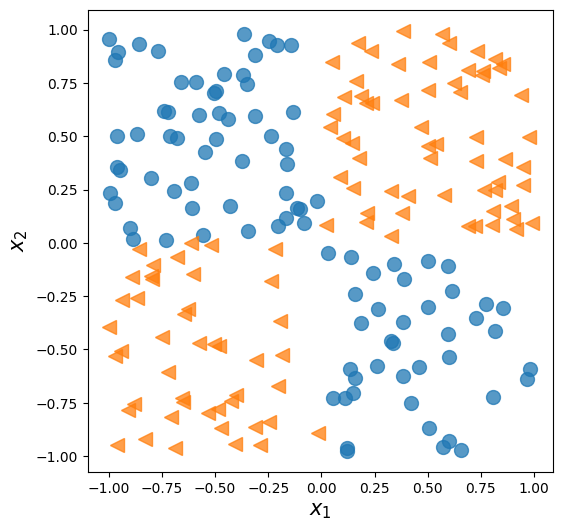

In [31]:
tf.random.set_seed(1)
np.random.seed(1)

x = np.random.uniform(low=-1, high=1, size=(200, 2))
y = np.ones(len(x))
y[x[:, 0] * x[:, 1]<0] = 0

x_train = x[:100, :]
y_train = y[:100]
x_valid = x[100:, :]
y_valid = y[100:]

fig = plt.figure(figsize=(6, 6))
plt.plot(x[y==0, 0], 
         x[y==0, 1], 'o', alpha=0.75, markersize=10)
plt.plot(x[y==1, 0], 
         x[y==1, 1], '<', alpha=0.75, markersize=10)
plt.xlabel(r'$x_1$', size=15)
plt.ylabel(r'$x_2$', size=15)
# plt.savefig('images/14_1.png', dpi=300)
plt.show()

경험적으로 보면 층이 많을수록 각 층에 뉴런 개수가 많을수록 모델의 수용 능력이 크다.  
여기서 모델의 수용 능력은 모델이 얼마나 복잡한 함수를 근사할 수 있는지를 측정한 것으로 생각할 수 있다.  
많은 파라미터를 가지고 있으면 모델이 복잡한 함수를 근살할 수 있지만 모델이 클수록 훈련하기 힘들다.(그리고 과대적합되기 쉽다.) 실제로는 로지스틱 회귀, 즉 간단한 단일층 신경망처럼 간단한 기본 모델로 시작하는 것이 좋다.

In [32]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, 
                                input_shape=(2,), 
                                activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


간단한 이 로지스틱 회귀 모델의 전체 파라미터 크기는 3이다. 가중치 행렬(또는 커널)의 크기가 2X1이고 절편 벡터의 크기는 1이다.  
모델을 정의한 후 컴파일하고 배치 크기 2로 200 에포크 동안 훈련한다.

In [33]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

In [34]:
hist = model.fit(x_train, y_train, 
                 validation_data=(x_valid, y_valid), 
                 epochs=200, batch_size=2, verbose=0)

2022-11-22 22:54:36.127488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-22 22:54:36.430963: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


`model.fit()` 메서드는 훈련 에포크의 기록을 반환한다. 훈련한 후 이르 시각화하여 분석하기 좋다.  

/var/folders/tb/x7hcv5j94gn9b46c7qc1vfth0000gn/T/ipykernel_68948/3286167664.py:19: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
2022-11-22 22:55:57.653066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


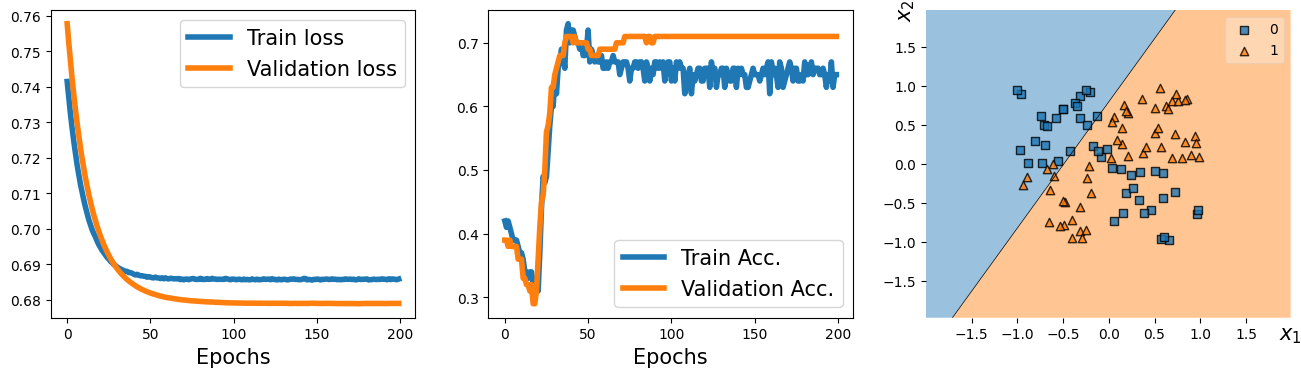

In [37]:
from mlxtend.plotting import plot_decision_regions

history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
# plt.savefig('images/14_2.png', dpi=300)
plt.show()

손실, 정확도, 결정 경계가 나타난 검증 샘플의 산점도가 세 개의 그래프로 나뉘어져 있다.  

여기서 볼 수 있듯이 은닉층이 없는 간단한 모델은 선형 결정 경계만 찾을 수 있다. 따라서 XOR 문제를 풀 수 없다. 이로 인해 훈련 데이터셋과 검증 데이터셋의 손실이 매우 높고 분류 정확도는 매우 낮다.  

비선형 결정 경계를 찾기 위해 비선형 활성화 함수를 사용한 한 개 이상의 은닉층을 추가할 수 있다.  
일반 근사 이론(universal approximation theorem)에 의하면 하나의 은닉층과 매우 많은 은닉 유닛을 가진 피드포워드 신경망은 임의의 연속 함수를 비교적 잘 근사할 수 있다.  
따라서 XOR 문제를 좀 더 만족스럽게 해결하는 한 가지 방법은 은닉층을 추가하고 검증 데이터셋에서 만족스러운 결과가 나올 때까지 은닉 유닛 개수를 바꾸면서 비교해 보는 것이다.  
은닉 유닛을 늘린다는 것은 층의 폭을 넓히는 것과 같다. 또는 더 많은 은닉층을 추가하여 모델의 깊이를 깊게 할 수도 있다. 네트워크의 폭 대신 깊이를 깊게 하면 비슷한 모델 수용 능력을 달성하는 데 필요한 파라미터 개수가 적다는 장점이 있다. 하지만 깊은 모델은 그레이디언트가 폭주하거나 소멸될 수 있어 훈련하기 어렵다는 단점도 있다.  

예를 위해 네 개의 은닉 유닛을 가진 한 개, 두 개, 세 개, 네 개의 은닉층을 추가해 보자.

In [38]:
tf.random.set_seed(1)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=4, input_shape=(2,), activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [39]:
## 컴파일:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

## 훈련:
hist = model.fit(x_train, y_train, 
                 validation_data=(x_valid, y_valid), 
                 epochs=200, batch_size=2, verbose=0)

history = hist.history

2022-11-22 23:02:17.521782: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-22 23:02:18.528728: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


/var/folders/tb/x7hcv5j94gn9b46c7qc1vfth0000gn/T/ipykernel_68948/217449913.py:15: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
2022-11-22 23:03:51.178491: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


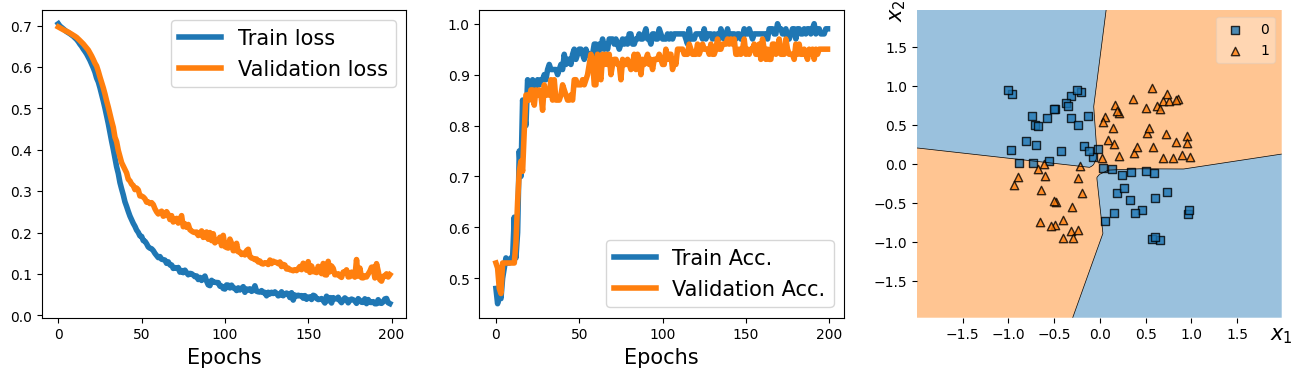

In [40]:
fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
# plt.savefig('images/14_3.png', dpi=300)
plt.show()

모델이 이 데이터에서 비선형 결정 경계를 찾은 것을 볼 수 있다. 이 모델은 훈련 데이터셋에서 100% 정확도를 달성했다. 검증 데이터셋의 정확도는 95%로 모델이 약간 과대적합된 것으로 보인다.

## 케라스 함수형 API로 유연성이 높은 모델 만들기

이전 예제에서 케라스 `Sequential` 클래스로 여러 개의 층을 가진 완전 연결 신경망을 만들었다. 모델을 만드는 간편하고 일반적인 방법이다. 하지만 안타깝지만 여러 개의 입력이나 출력을 가지거나 중간 가지(branch)가 있는 복잡한 모델을 만들 수 없다. 그래서 케라스 함수형 API가 필요하다.  

함수형 API 사용 방법을 알아보기 위해 이전 절에서 객체 지향 방식(Sequential)을 사용해서 만든 신경망을 동일하게 만들어 본다.  
이 방식에서는 먼저 입력을 지정한다. 그다음 은닉층을 만든다. 은닉층의 출력은 각각 h1, h2, h3이다.  
여기서는 각 층의 출력을 이어지는 층의 입력으로 사용한다. 

In [41]:
tf.random.set_seed(1)

## 입력층
inputs = tf.keras.Input(shape=(2,))

## 은닉층
h1 = tf.keras.layers.Dense(units=4, activation='relu')(inputs)
h2 = tf.keras.layers.Dense(units=4, activation='relu')(h1)
h3 = tf.keras.layers.Dense(units=4, activation='relu')(h2)

## 출력층
outputs = tf.keras.layers.Dense(units=1, activation='sigmoid')(h3)

## 모델 만들기
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 12        
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [42]:
## 컴파일
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

## 훈련
hist = model.fit(x_train, y_train, 
                 validation_data=(x_valid, y_valid), 
                 epochs=200, batch_size=2, verbose=0)

2022-11-22 23:09:28.219489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-22 23:09:28.687773: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


/var/folders/tb/x7hcv5j94gn9b46c7qc1vfth0000gn/T/ipykernel_68948/594423381.py:18: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
2022-11-22 23:11:01.413976: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


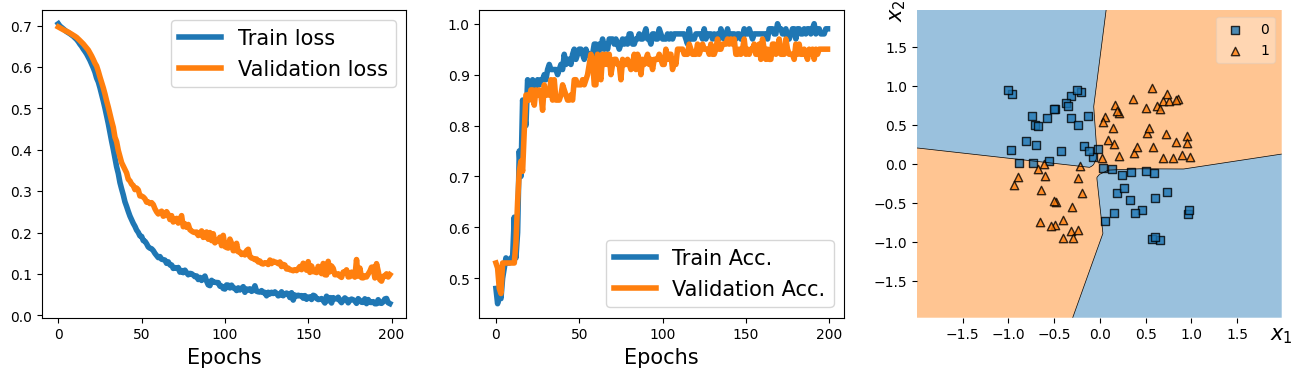

In [43]:
## 그래프 그리기
history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

## 케라스의 Model 클래스 기반으로 모델 만들기

복잡한 모델을 만들 수 있는 또 다른 방법은 `tf.keras.Model` 클래스르 상속하는 것이다. 이 방법에서는 `tf.keras.Model` 클래스를 상속한 새로운 클래스를 만들고 생성자 `__init__()` 메서드를 정의한다.  
`call()` 메서드를 사용하여 정방향 계산을 정의한다. 생성자 메서드 `__init__()`에서는 self 변수를 통해 참조할 수 있도록 클래스 속성으로 층을 정의한다. 그다음 `call()` 메서드에서 이런 층이 어떻게 신경망의 정방향 계산에 사용되는지 정의한다.

In [44]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.hidden_1 = tf.keras.layers.Dense(units=4, activation='relu')
        self.hidden_2 = tf.keras.layers.Dense(units=4, activation='relu')
        self.hidden_3 = tf.keras.layers.Dense(units=4, activation='relu')
        self.output_layer = tf.keras.layers.Dense(units=1, activation='sigmoid')

    def call(self, inputs):
        h = self.hidden_1(inputs)
        h = self.hidden_2(h)
        h = self.hidden_3(h)
        return self.output_layer(h)

모든 은닉층의 출력에 동일한 변수 h르 사용하여 코드를 따라 읽기 쉽게 만들었다.  

`tf.keras.Model` 클래스를 상속한 모델 클래스는 일반적인 모델 속성을 상속한다. `build()`, `compile()`, `fit()` 메서드 등이다.  
따라서 클래스의 객체를 만들면 케라스로 만든 다른 모델과 마찬가지로 컴파일하고 훈련할 수 있다.

In [45]:
tf.random.set_seed(1)

## 테스트
model = MyModel()
model.build(input_shape=(None, 2))

model.summary()

## 컴파일
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

## 훈련
hist = model.fit(x_train, y_train,
                 validation_data=(x_valid, y_valid),
                 epochs=200, batch_size=2, verbose=0)

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             multiple                  12        
_________________________________________________________________
dense_14 (Dense)             multiple                  20        
_________________________________________________________________
dense_15 (Dense)             multiple                  20        
_________________________________________________________________
dense_16 (Dense)             multiple                  5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


2022-11-22 23:21:35.950490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-22 23:21:36.429193: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


/var/folders/tb/x7hcv5j94gn9b46c7qc1vfth0000gn/T/ipykernel_68948/594423381.py:18: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
2022-11-22 23:23:11.803953: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


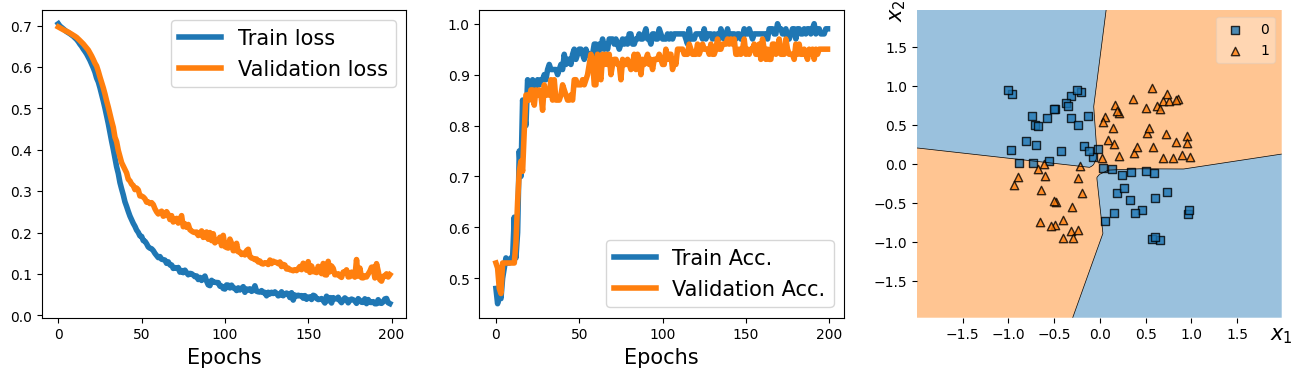

In [46]:
## 그래프 그리기
history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

### Note
텐서플로 2.2부터는 `tf.keras.Model` 클래스를 상속한 경우 `train_step()` 메서드에서 tf.GradientTape 컨텍스트로 훈련 단계를 세밀하게 조정할 수 있다.  
예를 들어 앞서 만든 `MyModel` 클래스를 상속한 `MyCustomMode`l 클래스를 만들어 본다. 이 클래스는 `MyModel`의 `__init__()` 메서드와 `call()` 메서드를 그대로 사용한다.  
대신 `train_step()` 메서드에서 정방향 계산과 그레이디언트 업데이트를 직접 수행해 본다.

In [47]:
class MyCustomStepModel(MyModel):
    
    def train_step(self, data):
        # fit()에서 전달된 데이터
        x, y = data

        # 그레이디언트 기록 시작
        with tf.GradientTape() as tape:
            # 정방향 계산
            y_pred = self(x)
            # compile() 메서드에서 지정한 손실 계산
            loss = self.compiled_loss(y, y_pred, regularization_losses=self.losses)

        # 훈련가능한 파라미터에 대한 그레이디언트 계산
        gradients = tape.gradient(loss, self.trainable_variables)
        # 파라미터 업데이트
        self.optimizer.apply_gradients(zip(gradients, self.trainable_variables))
        
        # TF 2.4에서는 
        # self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
        
        # compile() 메서드에서 지정한 지표 계산
        self.compiled_metrics.update_state(y, y_pred)
        
        # 현재까지 지표와 결괏값을 딕셔너리로 반환
        return {m.name: m.result() for m in self.metrics}

In [48]:
tf.random.set_seed(1)

## 테스트
model = MyCustomStepModel()
model.build(input_shape=(None, 2))

model.summary()

## 컴파일
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## 훈련
hist = model.fit(x_train, y_train, 
                 validation_data=(x_valid, y_valid), 
                 epochs=200, batch_size=2, verbose=0)

Model: "my_custom_step_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             multiple                  12        
_________________________________________________________________
dense_18 (Dense)             multiple                  20        
_________________________________________________________________
dense_19 (Dense)             multiple                  20        
_________________________________________________________________
dense_20 (Dense)             multiple                  5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


2022-11-22 23:25:27.759770: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-22 23:25:28.240204: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


/var/folders/tb/x7hcv5j94gn9b46c7qc1vfth0000gn/T/ipykernel_68948/2800025416.py:18: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
2022-11-22 23:27:01.313291: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


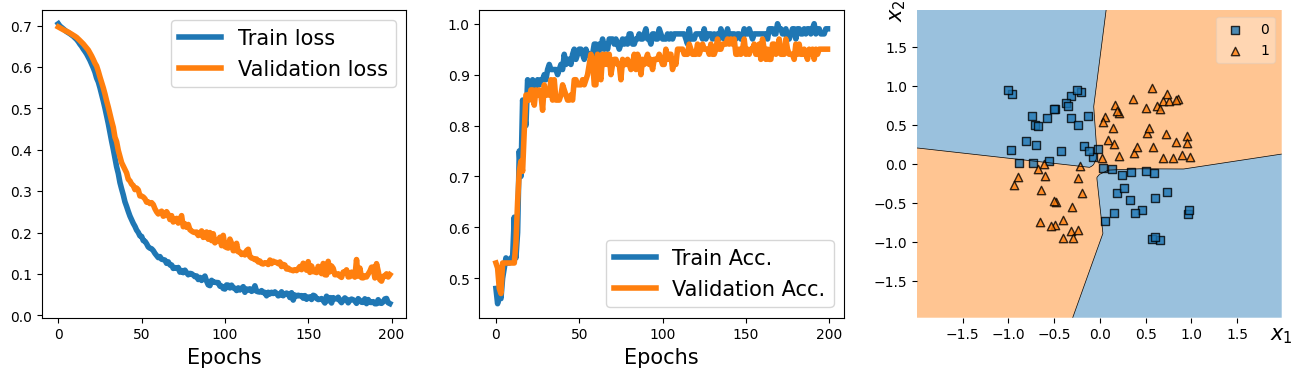

In [49]:
## 그래프 그리기
history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['accuracy'], lw=4)
plt.plot(history['val_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
plt.show()

## 사용자 정의 케라스 층 만들기

케라스에서 제공하지 않는 층을 새로 정의해야 하는 경우 `tf.keras.layers.Layer` 클래스를 상속하여 새로운 클래스를 정의할 수 있다. 새로운 층을 만들거나 기존 층을 커스터마이징할 때 특히 유용하다.  

In [50]:
class NoisyLinear(tf.keras.layers.Layer):
    def __init__(self, output_dim, noise_stddev=0.1, **kwargs):
        self.output_dim = output_dim
        self.noise_stddev = noise_stddev
        super(NoisyLinear, self).__init__(**kwargs)

    def build(self, input_shape):
        self.w = self.add_weight(name='weights',
                                 shape=(input_shape[1], self.output_dim),
                                 initializer='random_normal',
                                 trainable=True)
        
        self.b = self.add_weight(shape=(self.output_dim,),
                                 initializer='zeros',
                                 trainable=True)

    def call(self, inputs, training=False):
        if training:
            batch = tf.shape(inputs)[0]
            dim = tf.shape(inputs)[1]
            noise = tf.random.normal(shape=(batch, dim),
                                     mean=0.0,
                                     stddev=self.noise_stddev)

            noisy_inputs = tf.add(inputs, noise)
        else:
            noisy_inputs = inputs
        z = tf.matmul(noisy_inputs, self.w) + self.b
        return tf.keras.activations.relu(z)
    
    def get_config(self):
        config = super(NoisyLinear, self).get_config()
        config.update({'output_dim': self.output_dim,
                       'noise_stddev': self.noise_stddev})
        return config

생성자에서 $\epsilon$ 분포의 표준 편차를 지정하는 `noise_stddev`매개변수를 추가했다. $\epsilon$은 가우시안 분포에서 샘플링된다.  
또한, `call()` 메서드에서 `training=False` 매개변수를 사용한다. 케라스에서 `training`은 어떤 모델이나 층이 훈련에서만 사용되는지 구분하기 위한 특별한 불리언 매개변수이다.  

다음 코드에서 이 층의 인스턴스 객체르 만드고 `.build()` 메서드를 호출하여 초기화한다. 그리고 입력 텐서를 전달하여 실행한다. 그다음 `.get_config()` 메서드를 호출하여 직렬화하고 `.from_config()` 메서드를 사용해서 직렬화된 객체를 복원한다.

In [52]:
## 테스트

tf.random.set_seed(1)

noisy_layer = NoisyLinear(4)
noisy_layer.build(input_shape=(None, 4))

x = tf.zeros(shape=(1, 4))
tf.print(noisy_layer(x, training=True))

## 설정을 사용해 모델 만들기
config = noisy_layer.get_config()
new_layer = NoisyLinear.from_config(config)
tf.print(new_layer(x, training=True))

[[0 0.00821428 0 0]]
[[0 0.0108502861 0 0]]


이전 코드에서 같은 입력 텐서로 이 층을 두 번 호출했다. `NoisyLinear` 층이 입력 텐서에 랜덤한 잡음을 추가하기 때문에 두 결과가 다르다.  

이제 XOR 분류 문제를 풀기 위해 만들었던 모델과 비슷한 새롱누 모델을 만들어 보자. 이전처럼 케라스의 `Sequential` 클래스를 사용하지만 이번에는 `NoisyLinear` 층을 다층 퍼셉트론의 첫 번째 은닉층으로 사용한다.

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
noisy_linear_2 (NoisyLinear) (None, 4)                 12        
_________________________________________________________________
dense_21 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 5         
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


2022-11-22 23:34:23.117514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-11-22 23:34:23.664772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
/var/folders/tb/x7hcv5j94gn9b46c7qc1vfth0000gn/T/ipykernel_68948/1222158704.py:40: DeprecationWarning: Converting `np.integer` or `np.signedinteger` to a dtype is deprecated. The current result is `np.dtype(np.int_)` which is not strictly correct. Note that the result depends on the system. To ensure stable results use may want to use `np.int64` or `np.int32`.
  plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
2022-11-22 23:36:01.326950: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


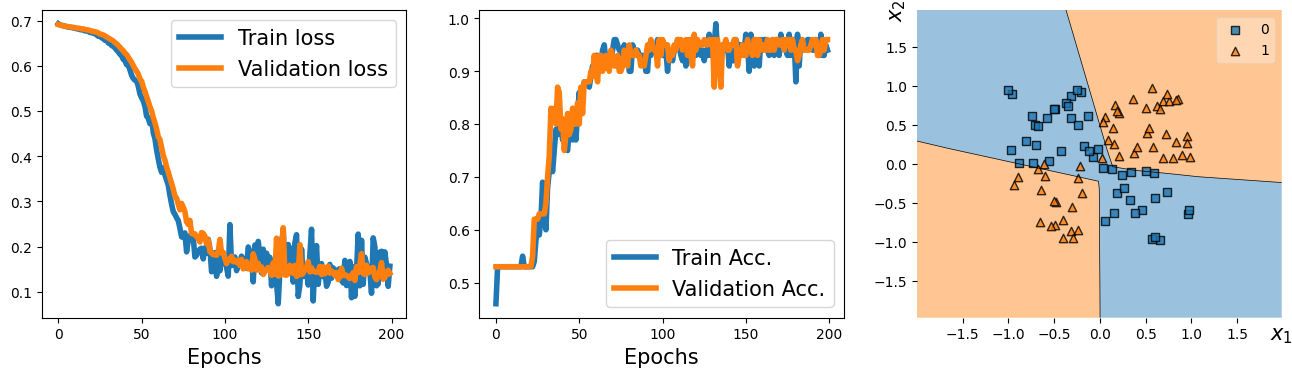

In [53]:
tf.random.set_seed(1)

model = tf.keras.Sequential([
    NoisyLinear(4, noise_stddev=0.1),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=4, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')])

model.build(input_shape=(None, 2))
model.summary()

## 컴파일
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy()])

## 훈련
hist = model.fit(x_train, y_train, 
                 validation_data=(x_valid, y_valid), 
                 epochs=200, batch_size=2, 
                 verbose=0)

## 그래프 그리기
history = hist.history

fig = plt.figure(figsize=(16, 4))
ax = fig.add_subplot(1, 3, 1)
plt.plot(history['loss'], lw=4)
plt.plot(history['val_loss'], lw=4)
plt.legend(['Train loss', 'Validation loss'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 2)
plt.plot(history['binary_accuracy'], lw=4)
plt.plot(history['val_binary_accuracy'], lw=4)
plt.legend(['Train Acc.', 'Validation Acc.'], fontsize=15)
ax.set_xlabel('Epochs', size=15)

ax = fig.add_subplot(1, 3, 3)
plot_decision_regions(X=x_valid, y=y_valid.astype(np.integer),
                      clf=model)
ax.set_xlabel(r'$x_1$', size=15)
ax.xaxis.set_label_coords(1, -0.025)
ax.set_ylabel(r'$x_2$', size=15)
ax.yaxis.set_label_coords(-0.025, 1)
# plt.savefig('images/14_4.png', dpi=300)
plt.show()

여기서는 `tf.keras.layers.Layer` 클래스를 상속하여 새로운 사용자 정의 층을 만들고 일반적인 케라스 층처러 ㅁ사용하는 방법을 배우는 것이 목적이다.  

일반적으로 새로운 상용자 정의 층을 만드는 것은 여러 애플리케이션에서 유용하다. 